# **Project Summary: Employee Performance Analysis for INX Future Inc.**

**Objective**:
The goal of this project is to analyze employee data to identify the key factors influencing performance ratings. By building predictive models, the project aims to provide actionable insights to enhance employee performance and satisfaction. Additionally, the project seeks to recommend strategies for improving organizational outcomes based on data-driven analysis.

In [4]:

# First step is importing the neceessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is used to create static visualizations
import seaborn as sns # used for statistical visualisations eg heatmaps for correlations
from sklearn.model_selection import train_test_split # will be used to split my dataset into trainig and testing sets
from sklearn.ensemble import RandomForestClassifier #machine learning algorithm to classify employee performance
from sklearn.metrics import accuracy_score, classification_report # this is an evaluation metrcs that will show precision, accuracy score and F1 score
from sklearn.preprocessing import StandardScaler, LabelEncoder # Used to normalize numerical features to improve model performance, converts categorical labels intonumerical values(assists during correlation)
import warnings # suppresses unnecesary warnings
warnings.filterwarnings('ignore')

In [5]:
# loading the data set and viewing the first 5 rows
df=pd.read_excel('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (3).xls')
# Save as CSV
df.to_csv('output_file.csv', index=False)  # index=False to avoid saving row indices
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [6]:
#checking for basic information,the shape of the data and the summary statistics
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [7]:
df.describe(include=['object']) #include columns with the data type'object' to summarize categorical columns

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [8]:
df.isnull().sum() # checking for missing values



,0
EmpNumber,0
Age,0
Gender,0
EducationBackground,0
MaritalStatus,0
EmpDepartment,0
EmpJobRole,0
BusinessTravelFrequency,0
DistanceFromHome,0
EmpEducationLevel,0


# output shows no missing values

In [9]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


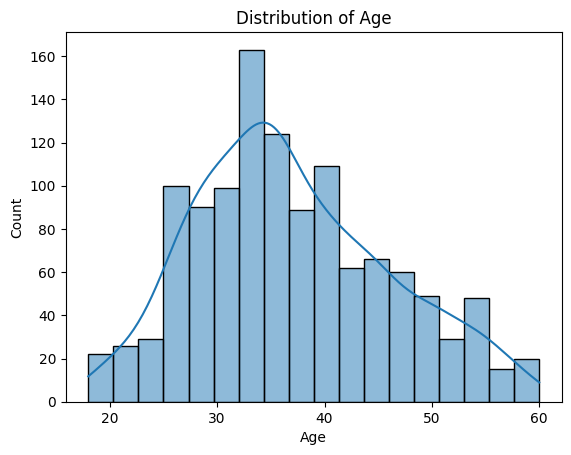

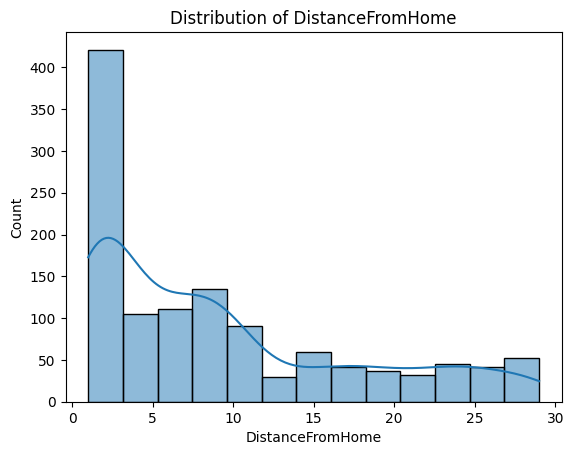

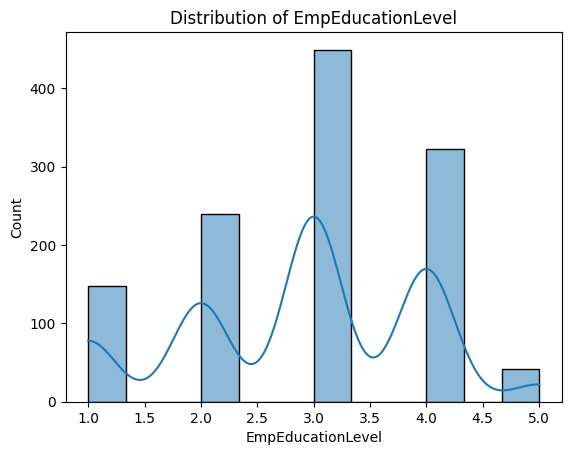

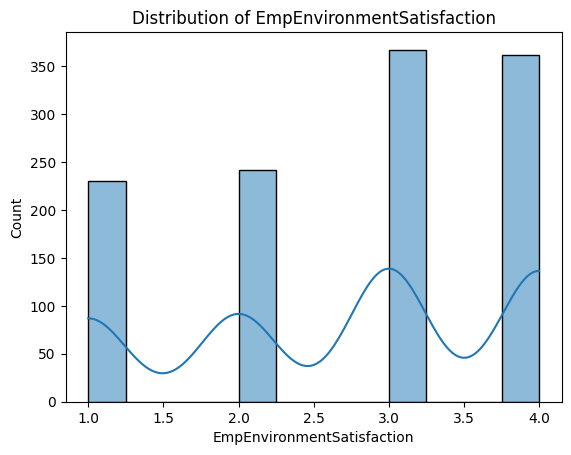

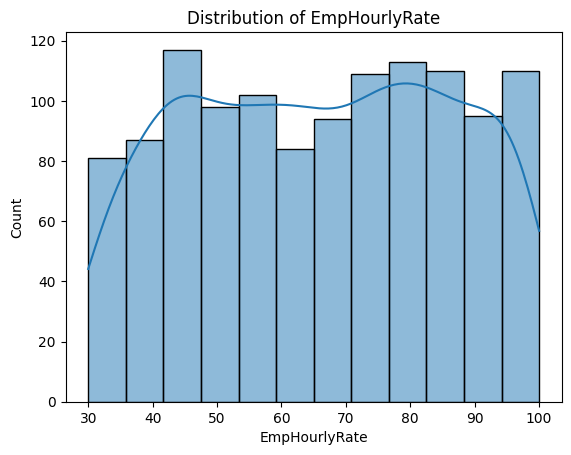

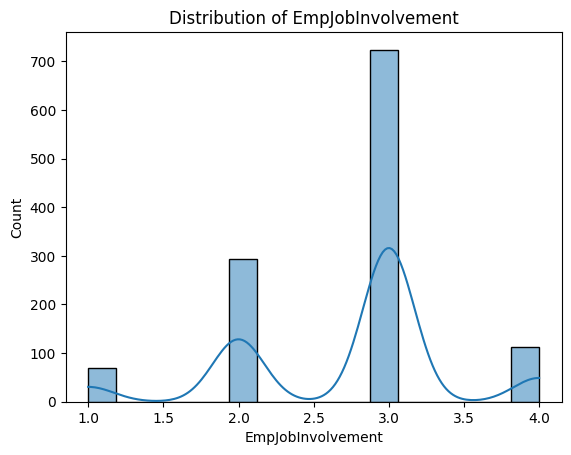

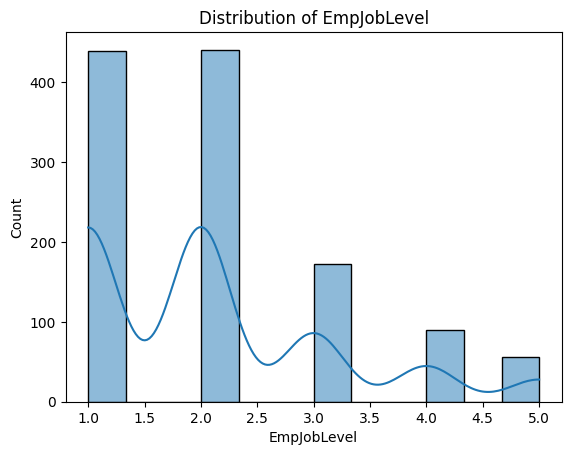

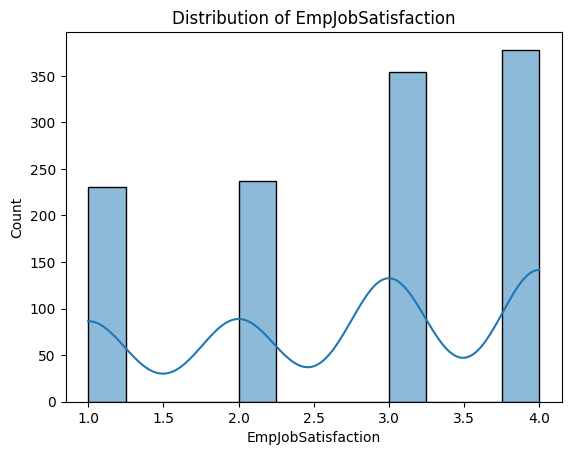

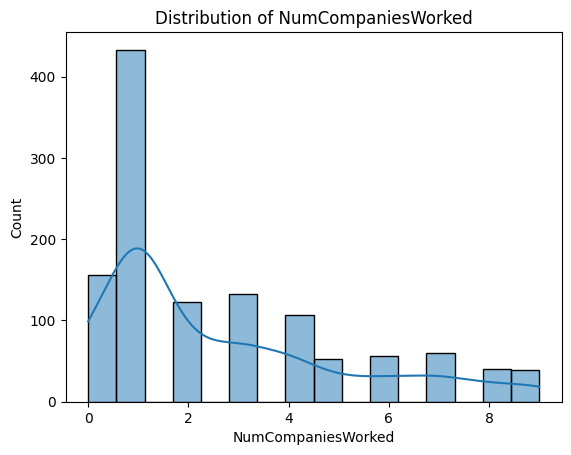

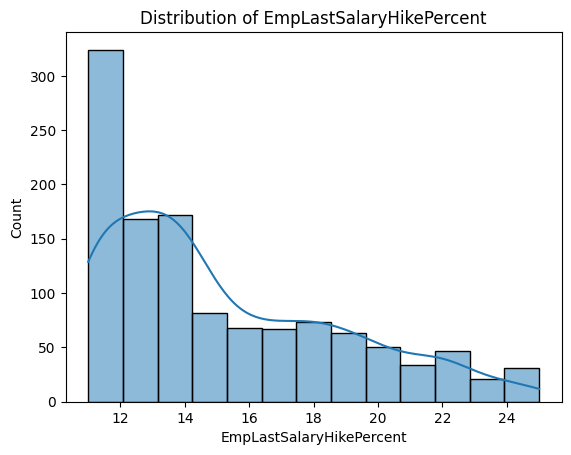

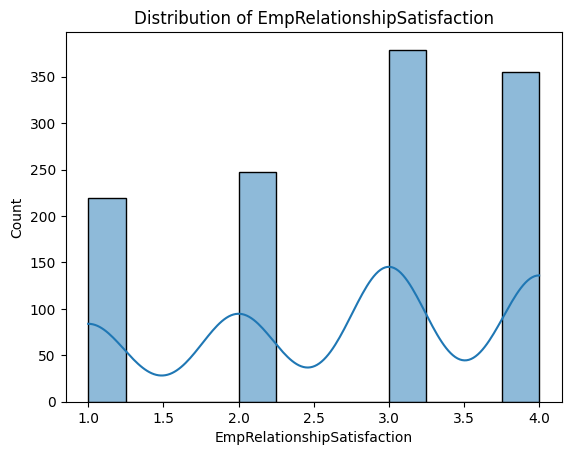

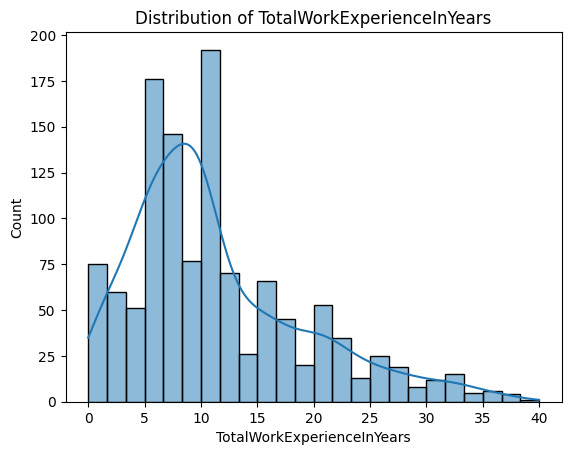

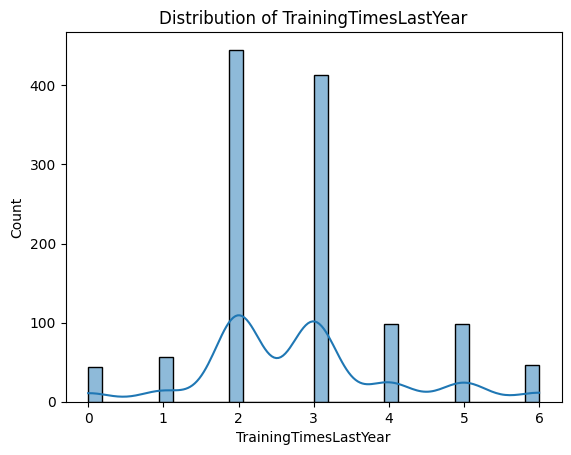

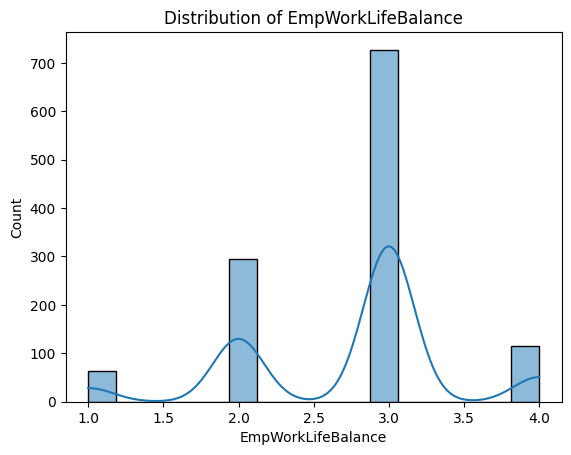

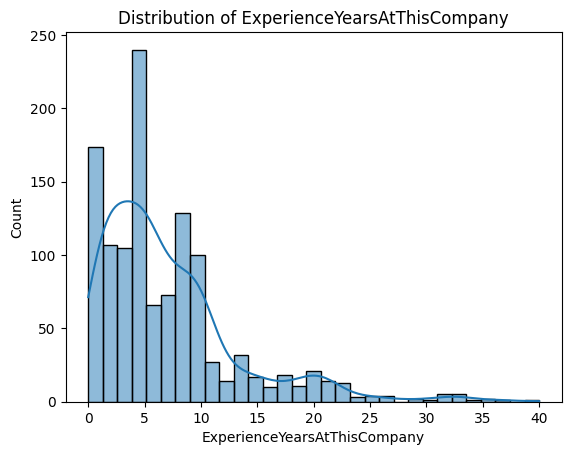

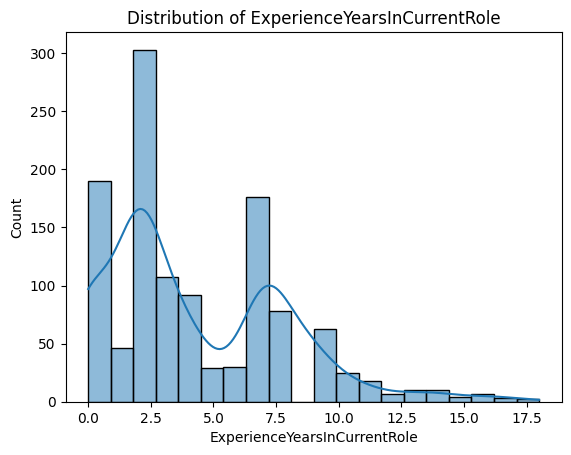

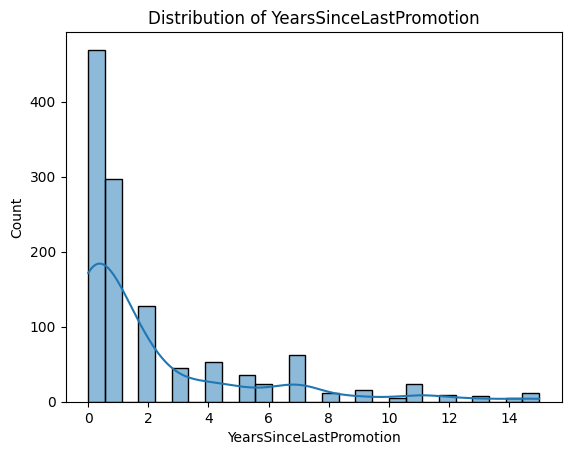

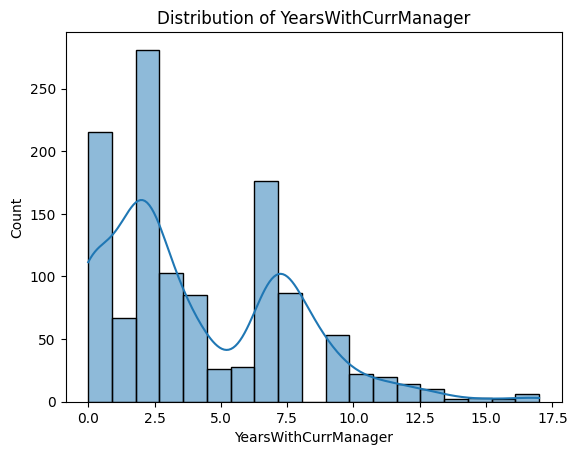

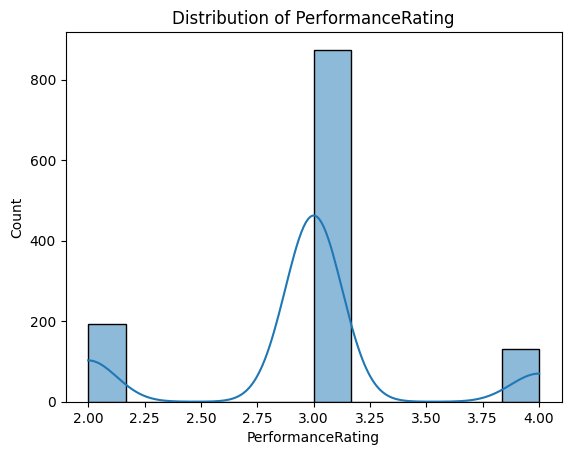

Number of duplicate rows: 0


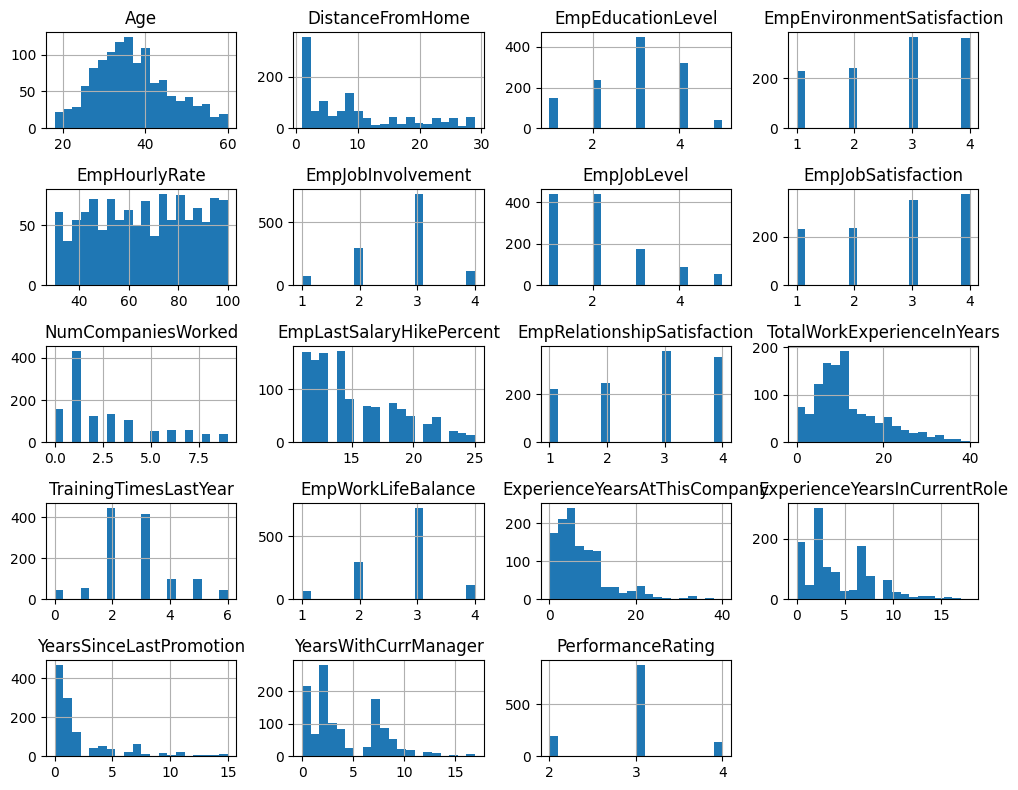

In [10]:
# exploratory data analysis tasks
for col in df.select_dtypes(include=['float64', 'int64']):
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

 #checking for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# visualization of all numeric columns together
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()



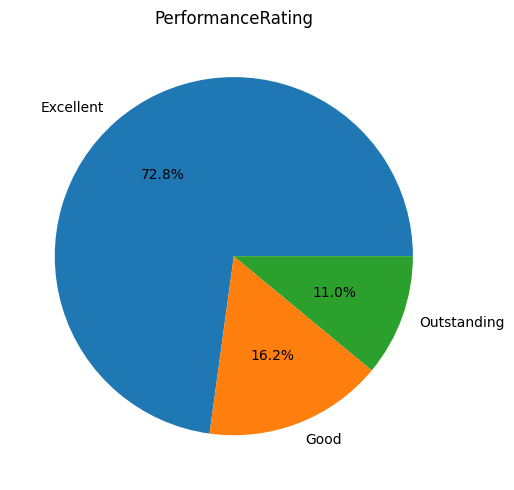

In [11]:
# PERFORMANCE ANALYSIS TASKS
#understanding perfomance across departments
department_performance = df.groupby('EmpDepartment')['PerformanceRating'].mean()
department_performance
department_std_dev = df.groupby('EmpDepartment')['PerformanceRating'].std()


# Create the pie chart
plt.figure(figsize=(10, 5))
df['PerformanceRating'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['Excellent', 'Good', 'Outstanding']  # Add custom labels here
)
plt.title('PerformanceRating')
plt.ylabel("")
plt.tight_layout()
plt.show()






Employees with good performance rating are 194 making 16.2%. Employees with excellent performance rating are 874 making 72.8%. Employees with outstanding performance rating are 132 making 11.0%. Conclusion: Excellent perfomance rating takes highest proportion, followed by good and outstanding performance takes the lowest proportion.

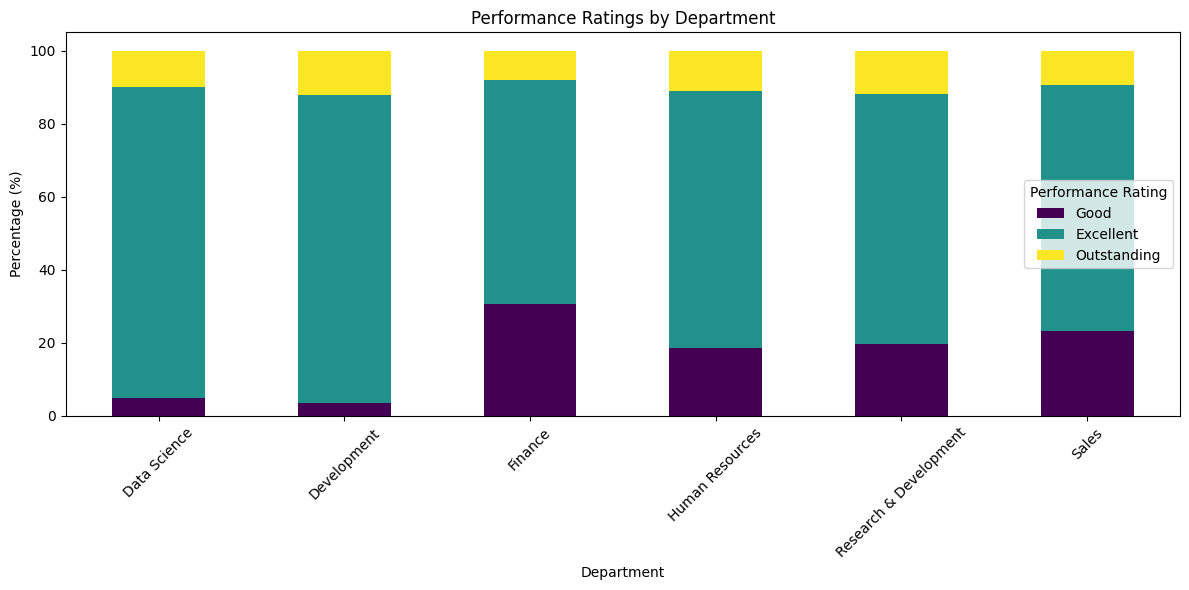

In [12]:
# Create a crosstab for performance ratings by department
performance_by_department = pd.crosstab(df['EmpDepartment'], df['PerformanceRating'], normalize='index') * 100

# Stacked bar chart
performance_by_department.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Performance Ratings by Department')
plt.xlabel('Department')
plt.ylabel('Percentage (%)')
plt.legend(title='Performance Rating', labels=['Good', 'Excellent', 'Outstanding'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Departments such as Data Science, Development, and Sales appear to have very similar distributions of performance ratings, with a high percentage of Excellent ratings and relatively low percentages of Good and Outstanding.

The Finance department shows a slight increase in the proportion of Good ratings compared to others, suggesting that this department may need more focus to elevate performance.

Human Resources and Research & Development maintain high levels of Excellent performance, but they also show minimal but noticeable variation in the Good category.

Departments like Finance may benefit from hiring strategies that prioritize candidates with demonstrated ability to perform well under challenging conditions.

Departments like Sales or Development may already have a robust system to ensure consistent performance at the Excellent level.

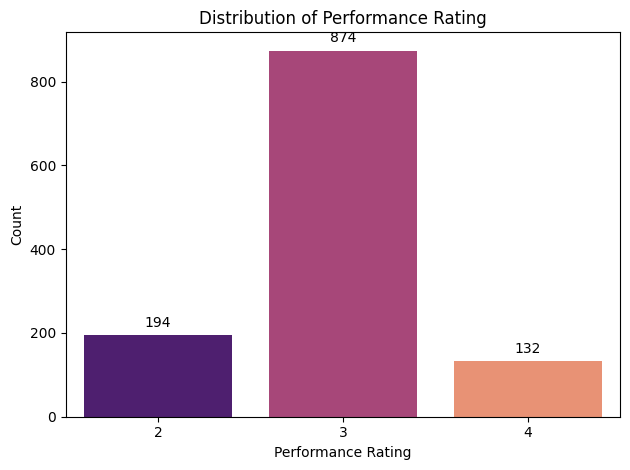

In [13]:
#plot the distribution of the performance rating using a bar chat
g=sns.countplot(x='PerformanceRating',data=df, palette='magma')
plt.title('Distribution of Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')
plt.tight_layout()
plt.show()

**Retention and Recognition for Outstanding Performers:**

The "Outstanding" group (11%) represents high-value employees. Recognize their efforts with promotions, bonuses, or awards to motivate and retain them.

**Developing Good Performers:**

The "Good" group (16.2%) may benefit from targeted training, mentoring, and opportunities for skill development to elevate their performance.

**Strengthening the Excellent Group:**

The largest group (72.8%) shows the organization’s overall competency level. Continuous feedback and incentives could help maintain or improve their performance.


# 1. Department wise performances

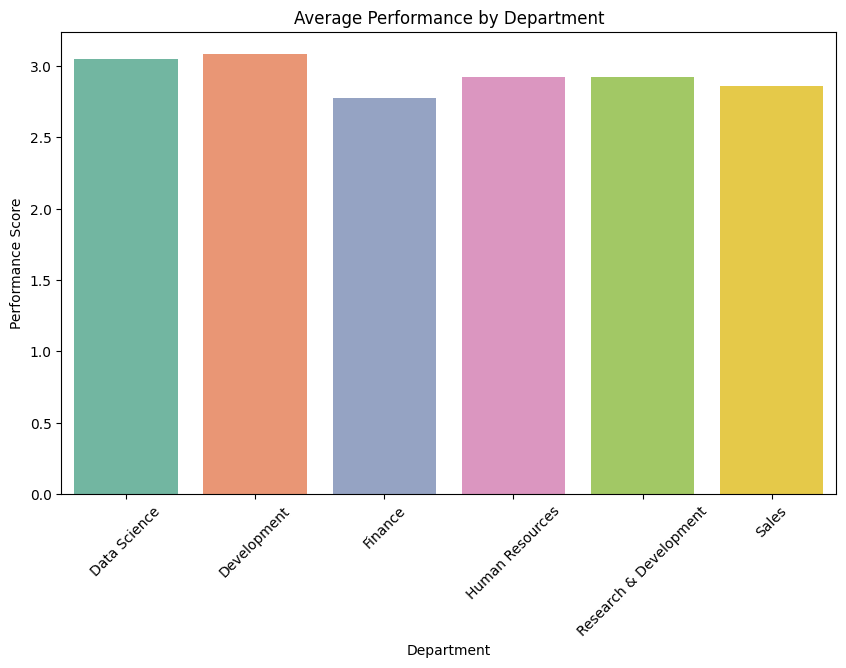

                        Average Performance  Performance Std Dev
EmpDepartment                                                   
Data Science                       3.050000             0.394034
Development                        3.085873             0.388508
Finance                            2.775510             0.586846
Human Resources                    2.925926             0.544331
Research & Development             2.921283             0.559016
Sales                              2.860590             0.555400


In [14]:

# visualization of department wise performance
plt.figure(figsize=(10,6))
sns.barplot(x=department_performance.index, y=department_performance.values, palette="Set2")
plt.title("Average Performance by Department")
plt.ylabel("Performance Score")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.show()

# Display performance stats: Mean and Standard Deviation
department_stats = pd.DataFrame({
    'Average Performance': department_performance,
    'Performance Std Dev': department_std_dev
})
print(department_stats)

The analysis of performance ratings across departments highlights notable trends. **Development stands out as the top-performing department**, with an average performance rating of 3.09 and a low standard deviation of 0.39, **indicating consistent performance among employees**. Similarly, **Data Science follows closely** with an average rating of 3.05 and a comparable standard deviation of 0.39, **reflecting stable performance** within the team. On the other hand, **Finance has the lowest average** performance rating of 2.78 and the highest variability, with a standard deviation of 0.59, **suggesting significant inconsistencies in employee performance**. Departments like Human Resources and Research & Development exhibit similar average ratings of 2.93 and 2.92, respectively, with moderate variability. Sales, with an average rating of 2.86 and a standard deviation of 0.56, demonstrates slightly lower performance and variability compared to others.

***Overall, while Development and Data Science maintain high and consistent performance, Finance shows the greatest need for targeted improvements to address performance inconsistencies. ***

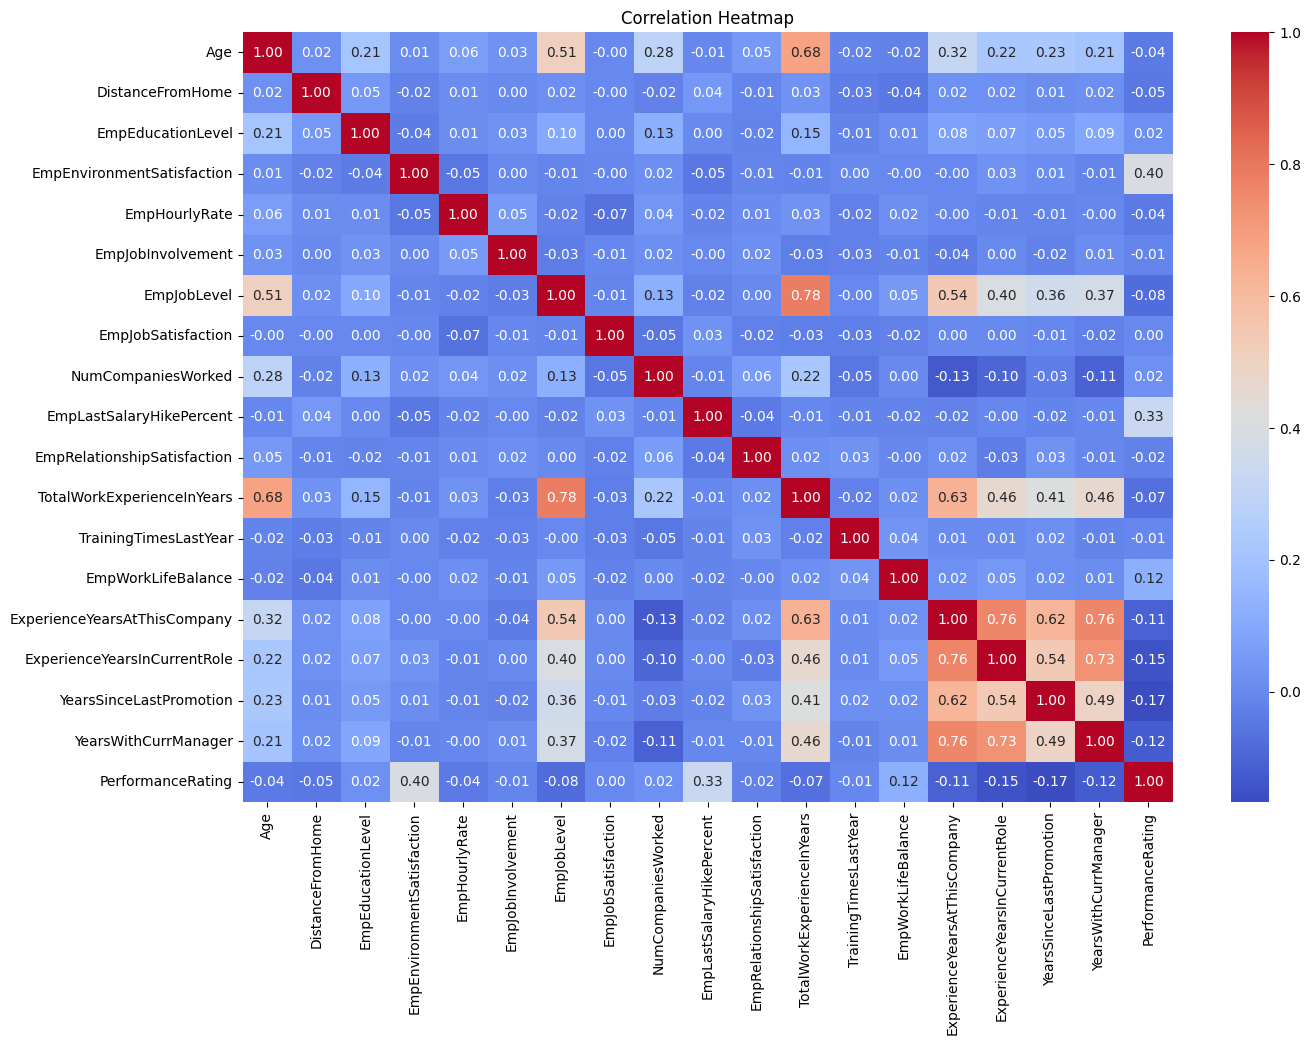

In [15]:
#To find the correlation heatmap using sns in numeric columns
numeric_columns = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

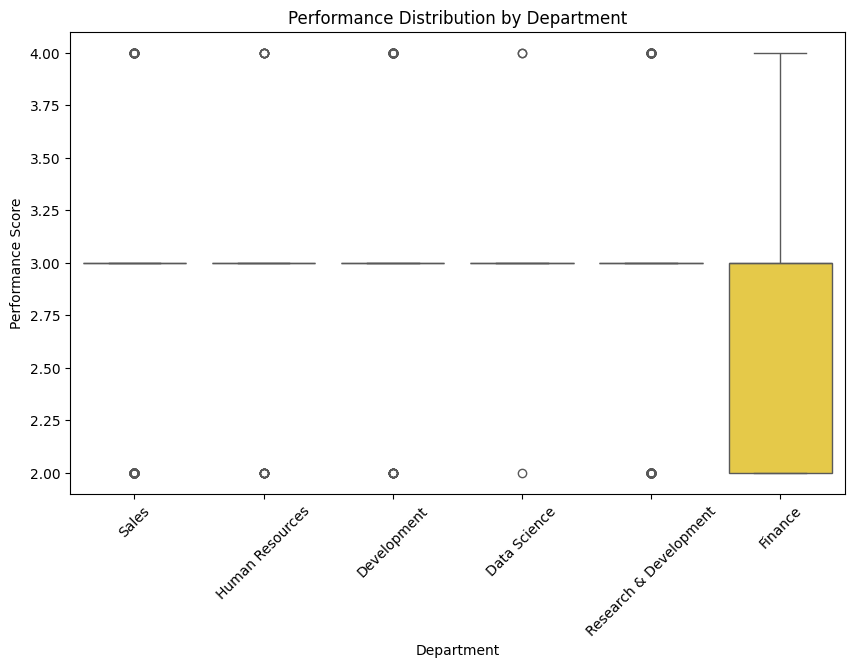

In [16]:
# This shows performance distribution by department using a boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='EmpDepartment', y='PerformanceRating', data=df, palette="Set2")
plt.title("Performance Distribution by Department")
plt.ylabel("Performance Score")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.show()


Finance Department:

The Finance department exhibits a wide range of performance scores. The box indicates the interquartile range (IQR), which suggests that performance in this department is more variable compared to others.
There are outliers at the lower end (around a score of 2), showing that some employees in this department significantly underperform compared to the majority.
Other Departments:

For the remaining departments (Sales, Human Resources, Development, Data Science, Research & Development), performance scores are tightly clustered around the median score of 3.
There is limited variability, suggesting that most employees in these departments perform at a similar level.
Outliers:

In all departments, there are some outliers at the low-performance end (score of 2). This indicates that a few employees in each department may not be meeting expectations.
Key Insight:

The Finance department stands out for its greater variability in performance. This could imply differences in workload, role complexity, or resource allocation compared to other departments. It might warrant further investigation into factors affecting performance in Finance, such as job satisfaction, work environment, or experience.
Actionable Recommendations:

Consider examining employee-level factors (e.g., job satisfaction, workload, training opportunities) specifically for the Finance department to address the variability and outliers.
For departments with tightly clustered scores, focus on maintaining consistency and exploring ways to improve the overall performance beyond the median.

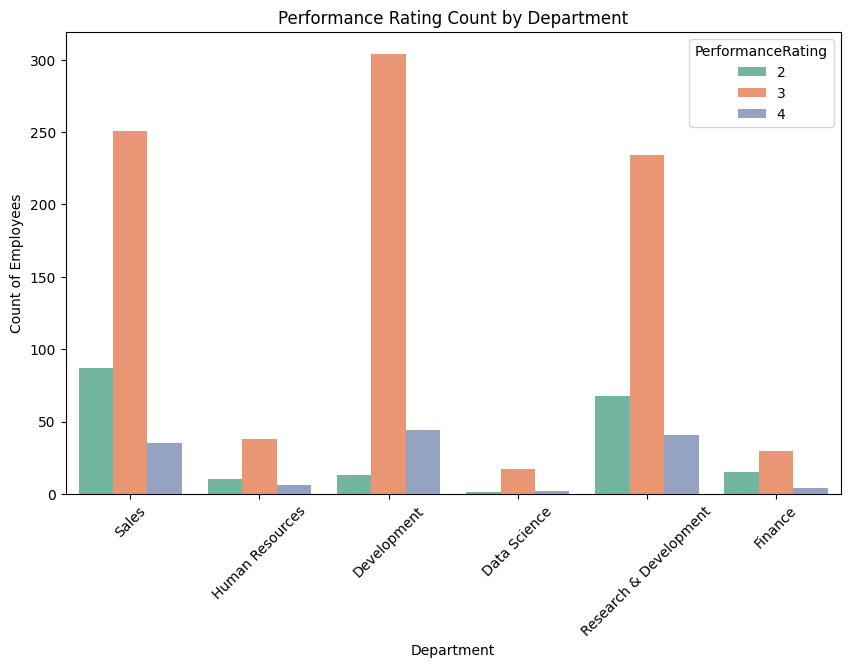

In [17]:
# Performance Score Count by Department:performance ratings across departments to give an understanding of how concentrated or spread the ratings are.
plt.figure(figsize=(10,6))
sns.countplot(x='EmpDepartment', hue='PerformanceRating', data=df, palette="Set2")
plt.title("Performance Rating Count by Department")
plt.ylabel("Count of Employees")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.show()

Departments like Sales and Research & Development might focus on initiatives to boost performance from Good (2) to Excellent (3) or Outstanding (4), particularly for employees falling in the lower rating category

The Finance department's notable count of "Outstanding (4)" ratings could be studied to identify best practices or processes that can be applied to other departments

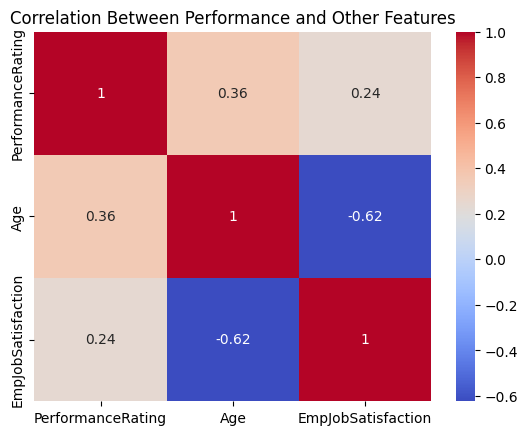

In [18]:
# Correlation Between Performance and Other Features:To assess whether other factors correlate with performance within each department. This is to help identify potential drivers of performance.
correlation = df.groupby('EmpDepartment').agg({
    'PerformanceRating': 'mean',
    'Age': 'mean',
    'EmpJobSatisfaction': 'mean',

})
sns.heatmap(correlation.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Performance and Other Features')
plt.show()

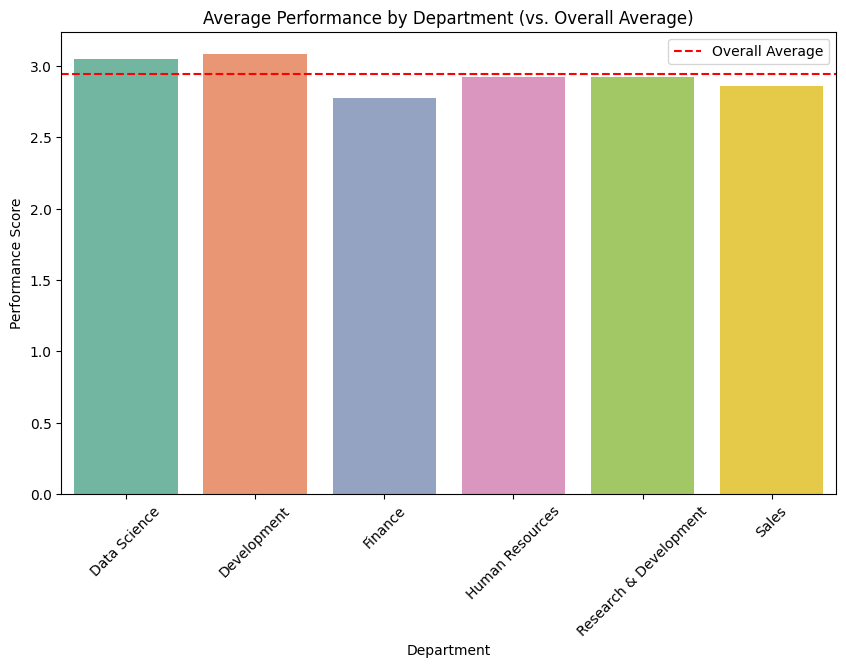

In [19]:
# Departmental Performance Compared to Overall Average: Adding a line showing the overall average performance across all departments to highlight which departments are performing better or worse than the company average.
overall_avg_performance = df['PerformanceRating'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=department_performance.index, y=department_performance.values, palette="Set2")
plt.axhline(y=overall_avg_performance, color='red', linestyle='--', label='Overall Average')
plt.title("Average Performance by Department (vs. Overall Average)")
plt.ylabel("Performance Score")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Departments like finance, human resource, research & development and sales perform less than the overall performance. Data science and development surpass the overall average indicating best performances.


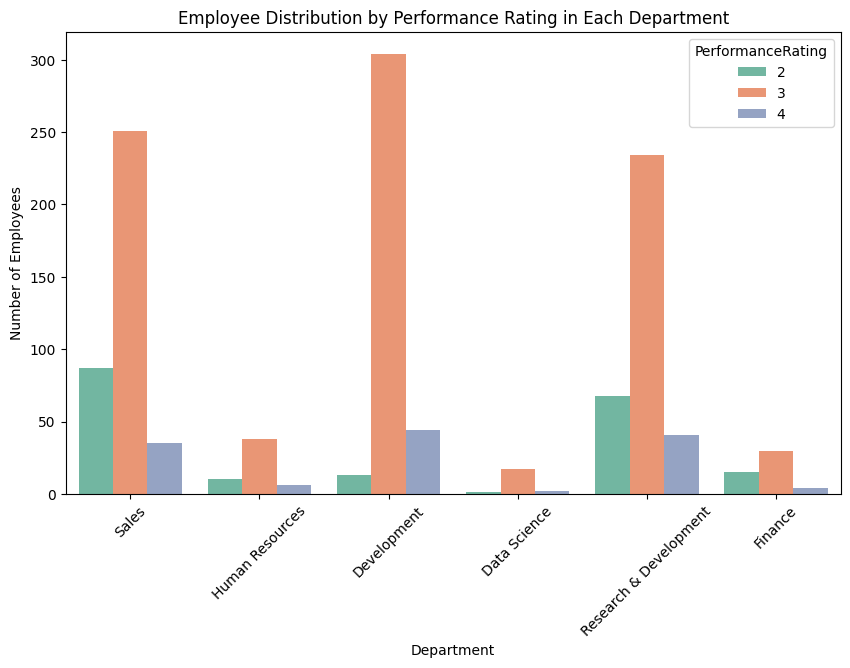

In [20]:
# Employee Distribution by Performance Rating within Each Department:
plt.figure(figsize=(10,6))
sns.countplot(x='EmpDepartment', hue='PerformanceRating', data=df, palette="Set2")
plt.title("Employee Distribution by Performance Rating in Each Department")
plt.ylabel("Number of Employees")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.show()

In [21]:
# Top and Bottom Performers in Each Department:
top_performers = df[df.groupby('EmpDepartment')['PerformanceRating'].transform(max) == df['PerformanceRating']]
bottom_performers = df[df.groupby('EmpDepartment')['PerformanceRating'].transform(min) == df['PerformanceRating']]

print("Top Performers:")
print(top_performers[['EmpDepartment', 'EmpNumber', 'PerformanceRating']])

print("Bottom Performers:")
print(bottom_performers[['EmpDepartment', 'EmpNumber', 'PerformanceRating']])



Top Performers:
     EmpDepartment EmpNumber  PerformanceRating
2            Sales  E1001007                  4
5      Development  E1001011                  4
12           Sales  E1001025                  4
18     Development  E1001041                  4
25           Sales  E1001054                  4
...            ...       ...                ...
1180   Development   E100958                  4
1190   Development   E100983                  4
1191         Sales   E100985                  4
1192         Sales   E100987                  4
1195         Sales   E100992                  4

[132 rows x 3 columns]
Bottom Performers:
               EmpDepartment EmpNumber  PerformanceRating
132                    Sales  E1001248                  2
162   Research & Development  E1001293                  2
164   Research & Development  E1001297                  2
165   Research & Development  E1001300                  2
169   Research & Development  E1001305                  2
...              

In [22]:
# summary statistics analysis that gives an overview of the performance in each department, such as the average, median, and range.
department_summary = df.groupby('EmpDepartment')['PerformanceRating'].describe()
print(department_summary)

                        count      mean       std  min  25%  50%  75%  max
EmpDepartment                                                             
Data Science             20.0  3.050000  0.394034  2.0  3.0  3.0  3.0  4.0
Development             361.0  3.085873  0.388508  2.0  3.0  3.0  3.0  4.0
Finance                  49.0  2.775510  0.586846  2.0  2.0  3.0  3.0  4.0
Human Resources          54.0  2.925926  0.544331  2.0  3.0  3.0  3.0  4.0
Research & Development  343.0  2.921283  0.559016  2.0  3.0  3.0  3.0  4.0
Sales                   373.0  2.860590  0.555400  2.0  3.0  3.0  3.0  4.0


In [23]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [24]:
# PREPROCESSING THE DATA
# separation of categorical and non categorical columns
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
non_categorical_columns = [col for col in df.columns if df[col].dtype != 'object']

# dropping columns that are not significant in prediction
df = df.drop(columns=['EmpNumber'], axis=1)

# Display the columns for confirmation
print(f'Categorical columns: {categorical_columns}')
print(f'Non-categorical columns: {non_categorical_columns}')

categorical_columns=[col for col in df.columns if df[col].dtype=='object']
categorical_columns



Categorical columns: ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']
Non-categorical columns: ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']


['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [25]:
# ENCODING CATEGORICAL VARIABLES
le=LabelEncoder()#to convert string datatypes to numeric datatypes
for col in categorical_columns:
  df[col]=le.fit_transform(df[col])


df.info()#to recheck the dataset summary after label encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           1200 non-null   int64
 1   Gender                        1200 non-null   int64
 2   EducationBackground           1200 non-null   int64
 3   MaritalStatus                 1200 non-null   int64
 4   EmpDepartment                 1200 non-null   int64
 5   EmpJobRole                    1200 non-null   int64
 6   BusinessTravelFrequency       1200 non-null   int64
 7   DistanceFromHome              1200 non-null   int64
 8   EmpEducationLevel             1200 non-null   int64
 9   EmpEnvironmentSatisfaction    1200 non-null   int64
 10  EmpHourlyRate                 1200 non-null   int64
 11  EmpJobInvolvement             1200 non-null   int64
 12  EmpJobLevel                   1200 non-null   int64
 13  EmpJobSatisfaction            120

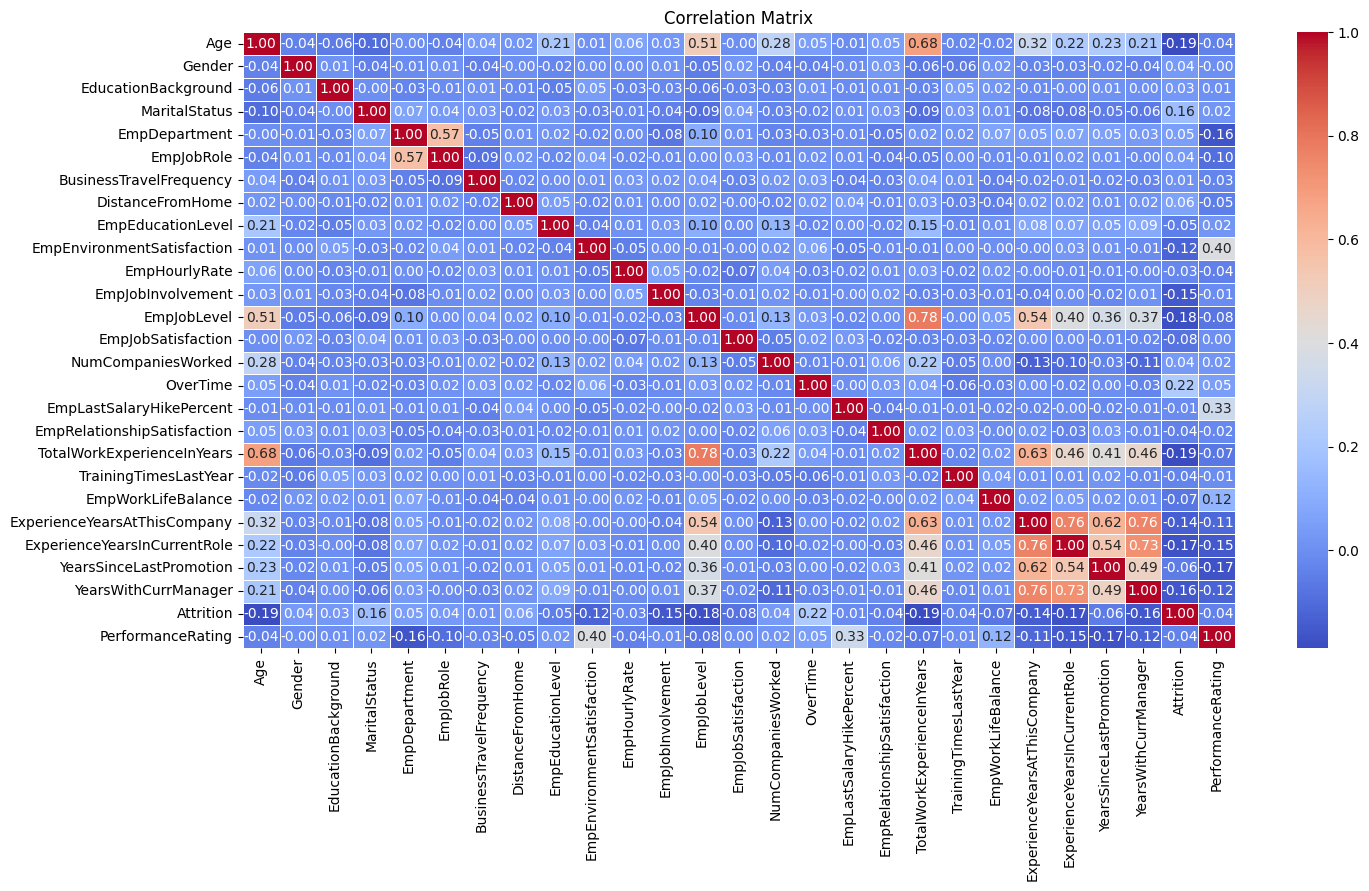

In [26]:
# CORRELATION
# Calculate correlation matrix
corr_matrix = df.corr()


# Visualize the correlation matrix
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



# 2. Top 3 Important Factors effecting employee performance


In [27]:
# Display the top 3 most correlated factors with Performance Score
performance_corr = corr_matrix['PerformanceRating'].sort_values(ascending=False)
print("Top 3 factors affecting Performance Score:")
print(performance_corr.head(4))  # The first one is the Performance Score itself, we exclude it.


Top 3 factors affecting Performance Score:
PerformanceRating             1.000000
EmpEnvironmentSatisfaction    0.395561
EmpLastSalaryHikePercent      0.333722
EmpWorkLifeBalance            0.124429
Name: PerformanceRating, dtype: float64


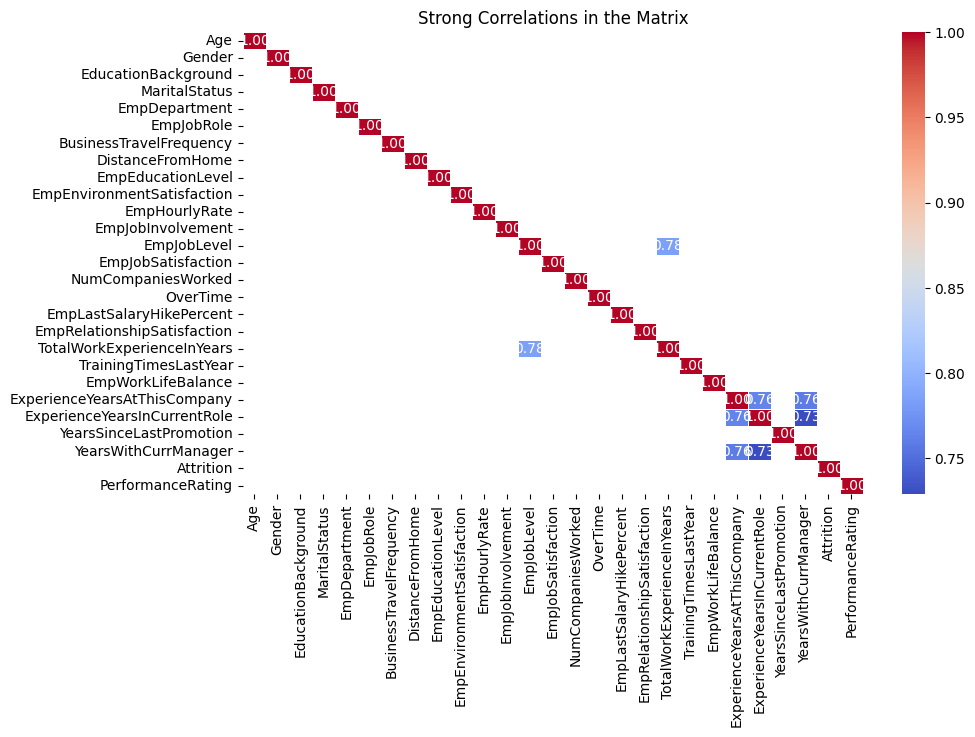

Top 3 negatively correlated factors with Performance Score:
ExperienceYearsInCurrentRole   -0.147638
EmpDepartment                  -0.162615
YearsSinceLastPromotion        -0.167629
Name: PerformanceRating, dtype: float64


In [28]:

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            mask=abs(corr_matrix) < 0.7)  # Show only strong correlations
plt.title('Strong Correlations in the Matrix')
plt.show()

print("Top 3 negatively correlated factors with Performance Score:")
print(performance_corr.tail(3))

In [29]:
df.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

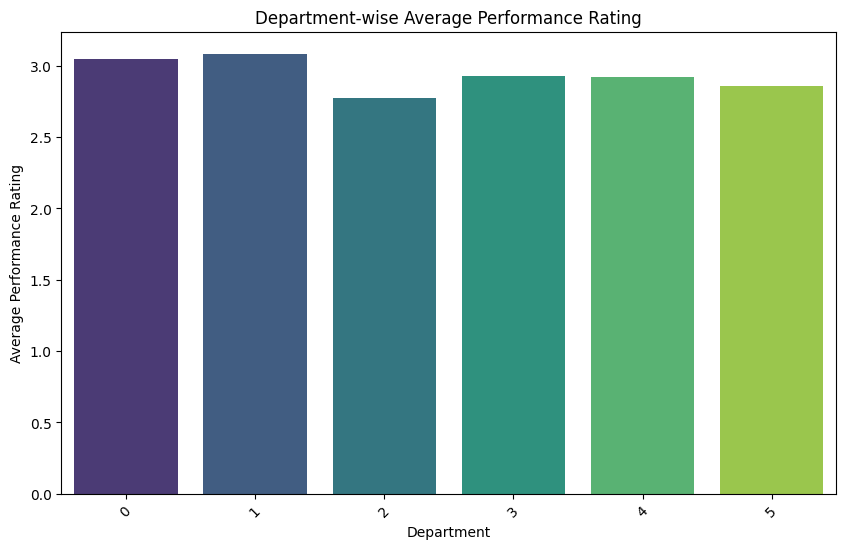

In [30]:
#  Checking department wise performance
department_performance = df.groupby('EmpDepartment')['PerformanceRating'].mean().reset_index()

# Plot the performance ratings by department
plt.figure(figsize=(10, 6))
sns.barplot(data=department_performance, x='EmpDepartment', y='PerformanceRating', palette='viridis')

# Adding labels and title
plt.title('Department-wise Average Performance Rating')
plt.xlabel('Department')
plt.ylabel('Average Performance Rating')

# Display the plot
plt.xticks(rotation=45)
plt.show()


In [31]:
# Feature-target split
X = df[['EmpDepartment', 'EmpJobSatisfaction']]  # Exclude 'PerformanceRating' to avoid data leakage
y = df['PerformanceRating']  # Target variable

# Encode categorical feature 'EmpDepartment'
X = pd.get_dummies(X, drop_first=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Check numeric feature correlations
correlation_with_target = df.corr()['PerformanceRating'].sort_values(ascending=False)
print("Correlation of Features with Target:")
print(correlation_with_target)

Train data shape: (960, 2), Test data shape: (240, 2)
Correlation of Features with Target:
PerformanceRating               1.000000
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
EmpWorkLifeBalance              0.124429
OverTime                        0.050206
MaritalStatus                   0.024172
NumCompaniesWorked              0.020980
EmpEducationLevel               0.020529
EducationBackground             0.005607
EmpJobSatisfaction              0.000606
Gender                         -0.001780
TrainingTimesLastYear          -0.005443
EmpJobInvolvement              -0.010539
EmpRelationshipSatisfaction    -0.019502
BusinessTravelFrequency        -0.031025
Attrition                      -0.039796
Age                            -0.040164
EmpHourlyRate                  -0.043116
DistanceFromHome               -0.046142
TotalWorkExperienceInYears     -0.068141
EmpJobLevel                    -0.076632
EmpJobRole                     -0.096209
Experie

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [33]:
# The target variable is PerformanceRating (make sure it's encoded if needed)
y = df['PerformanceRating']
df = df.drop(columns=['PerformanceRating'], axis=1)



In [34]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [35]:
# Scale the features for SVM (important to standardize data for SVM)
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, check the shapes of both scaled training and test data
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


X_train_scaled shape: (960, 26)
X_test_scaled shape: (240, 26)


# 3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees


In [36]:
# Initialize the SVM model
svm_clf = SVC(probability=True, random_state=42)

# Fit the model
svm_clf.fit(X_train_scaled, y_train)

# Predictions on the test data
y_pred_svm = svm_clf.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy}")

SVM Accuracy: 0.8416666666666667


In [37]:
# Feature importance: SVM doesn't provide feature importance directly like random forest
# But you can look at the coefficients in the case of linear SVM
if hasattr(svm_clf, 'coef_'):
    importance = svm_clf.coef_[0]
    # Print top features based on absolute coefficients
    importance_idx = sorted(range(len(importance)), key=lambda i: abs(importance[i]), reverse=True)[:3]
    print("Top 3 features based on SVM coefficients:")
    for idx in importance_idx:
        print(f"{X.columns[idx]}: {importance[idx]:.4f}")
else:
    print("SVM model does not provide feature importance directly (use RandomForest for that).")

SVM model does not provide feature importance directly (use RandomForest for that).


In [38]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only applicable for 'poly' kernel
}

grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.8010416666666668


Test Accuracy with Best SVM: 0.8458
Top 3 Features by Permutation Importance:
EmpLastSalaryHikePercent: 0.0892
EmpEnvironmentSatisfaction: 0.0617
EmpDepartment: 0.0183


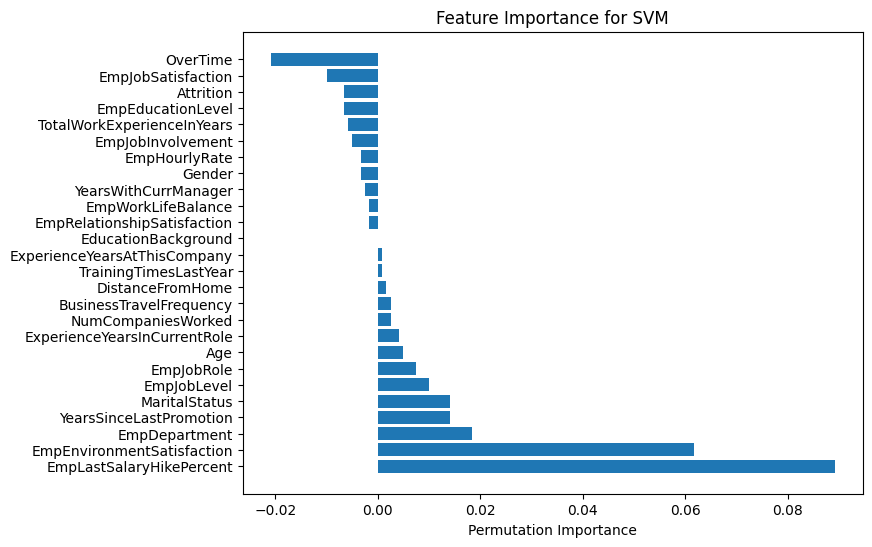

In [39]:
# Use the best estimator for final evaluation
best_svm = grid_search.best_estimator_
y_pred_best_svm = best_svm.predict(X_test_scaled)
print(f"Test Accuracy with Best SVM: {accuracy_score(y_test, y_pred_best_svm):.4f}")


from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(svm_clf, X_test_scaled, y_test, scoring='accuracy', random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

print("Top 3 Features by Permutation Importance:")
for idx in sorted_idx[:3]:
    print(f"{df.columns[idx]}: {perm_importance.importances_mean[idx]:.4f}")

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(df.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for SVM")
plt.show()


In [40]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # Random Forest doesn't require scaling
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.8458333333333333
Random Forest Accuracy: 0.9458333333333333


In [41]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, multi_class='ovr')
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_log_reg)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled), multi_class='ovr', average='macro')}\n")



Logistic Regression Evaluation:
Accuracy: 0.8291666666666667
Classification Report:
              precision    recall  f1-score   support

           2       0.54      0.52      0.53        29
           3       0.88      0.92      0.90       184
           4       0.79      0.56      0.65        27

    accuracy                           0.83       240
   macro avg       0.73      0.66      0.69       240
weighted avg       0.82      0.83      0.82       240

ROC AUC Score: 0.8973790460507208



In [42]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, rf_clf.predict_proba(X_test), multi_class='ovr', average='macro')}\n")


Random Forest Evaluation:
Accuracy: 0.9458333333333333
Classification Report:
              precision    recall  f1-score   support

           2       0.93      0.90      0.91        29
           3       0.95      0.98      0.97       184
           4       0.95      0.74      0.83        27

    accuracy                           0.95       240
   macro avg       0.94      0.87      0.90       240
weighted avg       0.95      0.95      0.94       240

ROC AUC Score: 0.9349233295060105



In [43]:
# Define models and preprocessing flags

from sklearn.ensemble import GradientBoostingClassifier

# Define and initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
# Fit the Gradient Boosting Classifier
gb_classifier.fit(X_train_scaled, y_train)


models = {
    'Logistic Regression': (log_reg, True),  # Needs scaling
    'Random Forest': (rf_clf, False),       # No scaling required
    'SVM': (svm_clf, True),                 # Needs scaling
    'Gradient Boost': (gb_classifier, True) # Needs scaling
}

# Cross-validation loop with preprocessing
for model_name, (model, needs_scaling) in models.items():
    if needs_scaling:
        X_data = X_train_scaled  # Use scaled data
    else:
        X_data = X_train         # Use unscaled data

    cv_scores = cross_val_score(model, X_data, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Logistic Regression Cross-Validation Accuracy: 0.7875
Random Forest Cross-Validation Accuracy: 0.9281
SVM Cross-Validation Accuracy: 0.7760
Gradient Boost Cross-Validation Accuracy: 0.9271


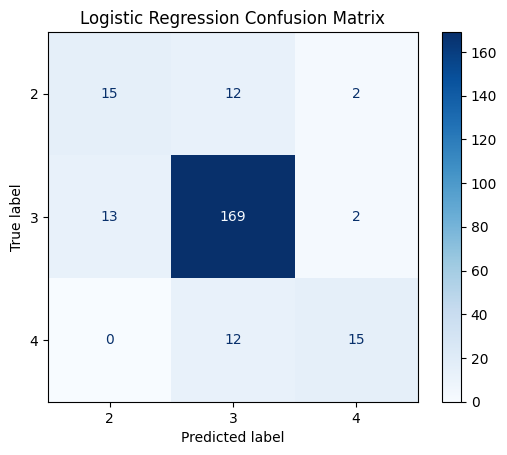

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test, cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


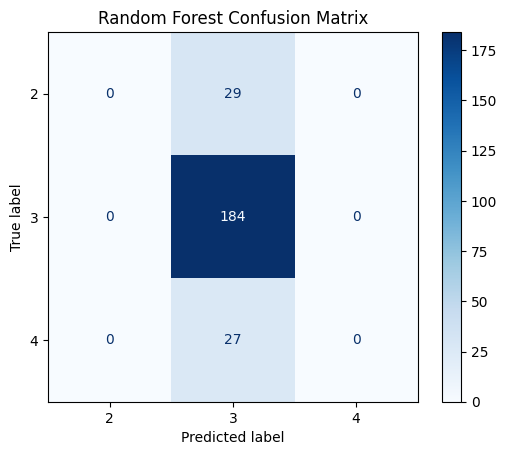

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_clf, X_test_scaled, y_test, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


 By using the trained Random Forest model, the organization can prioritize candidates who exhibit characteristics associated with high performance, thereby improving the overall hiring process.
 The "Excellent" category, with 184 employees identified, serves as an indicator of the type of performance expected from top candidates.

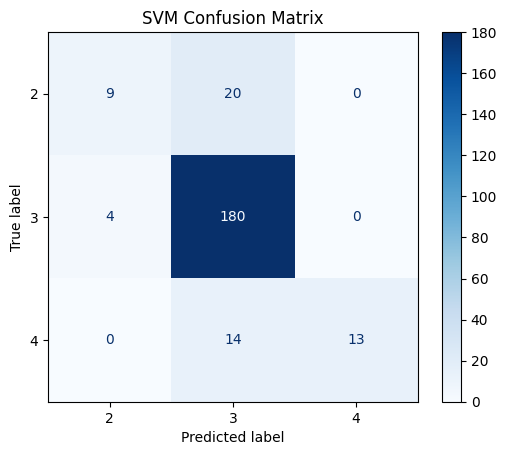

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svm_clf, X_test_scaled, y_test, cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


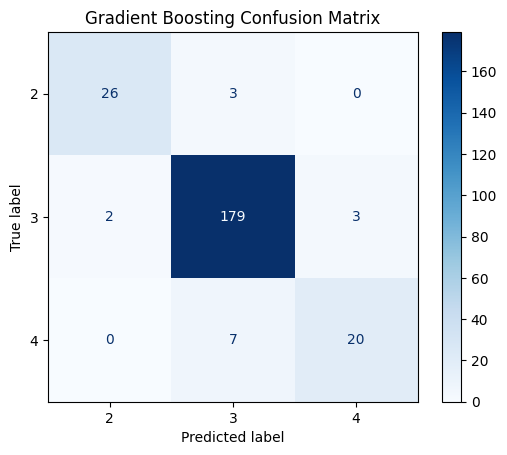

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(gb_classifier, X_test_scaled, y_test, cmap='Blues')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

In [48]:
# Model Comparison: Logistic Regression, Random Forest, and SVM
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_clf,
    'SVM': svm_clf,
    'Gradient Boost': gb_classifier
}

# Evaluate models and collect results
model_results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled if model_name in ['Logistic Regression', 'SVM'] else X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test_scaled if model_name in ['Logistic Regression', 'SVM'] else X_test), multi_class='ovr', average='macro')
    model_results[model_name] = {'Accuracy': accuracy, 'ROC AUC Score': auc_score}

# Display results
model_comparison = pd.DataFrame(model_results).T
print("Model Comparison:")
print(model_comparison)


Model Comparison:
                     Accuracy  ROC AUC Score
Logistic Regression  0.829167       0.897379
Random Forest        0.945833       0.934923
SVM                  0.841667       0.879985
Gradient Boost       0.741667       0.448127


The model comparison results show the performance of four machine learning models: Logistic Regression, Random Forest, SVM, and Gradient Boost. **Random Forest has the highest accuracy at 94.58%,** followed by SVM with 84.17% and Logistic Regression at 82.92%. **Gradient Boost, however, performs the worst with an accuracy of 66.25%.** When evaluating the models' ability to discriminate between classes, measured by the ROC AUC Score, Random Forest again leads with an impressive score of 0.9349, indicating strong classification performance. Logistic Regression follows with 0.8974, showing good performance as well. SVM has a slightly lower ROC AUC of 0.8800, but still performs decently. Gradient Boost lags significantly with an AUC of only 0.4443, which suggests that it struggles to effectively differentiate between classes in this dataset.

 This implies that*** Random Forest is the most robust model for this task***, while Gradient Boost is less effective.


In [49]:
# Overfitting check with Random Forest
train_accuracy = rf_clf.score(X_train, y_train)
test_accuracy = rf_clf.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

if train_accuracy < test_accuracy:
    print("Warning: Model may be overfitting!")
else:
    print("Model is not overfitting.")


Training Accuracy: 1.0
Test Accuracy: 0.9458333333333333
Model is not overfitting.


In [50]:
!pip freeze > requirements.txt


In [51]:
from google.colab import files
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the entire trained model (not just an array)
with open('rf_model L.pkl', 'wb') as file:
    pickle.dump(model, file)


In [56]:
from google.colab import files
files.download('rf_model L.pkl')  # This will trigger the download of the model file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4. Recommendations to improve the employee performance based on insights from analysis.



Based on the insights from the analysis and the performance of the Random Forest Classifier, **the following recommendations are proposed to enhance employee performance and optimize organizational decision-making:**

**Improve Employee Job Satisfaction:**

Job satisfaction emerged as a critical factor influencing performance. Implement regular feedback mechanisms, recognition programs, and career development opportunities to boost satisfaction across all departments.

**Enhance Workplace Environment Satisfaction:**

Environmental satisfaction showed strong correlations with performance. Investing in better workspaces, tools, and resources, as well as fostering a positive work culture, can significantly impact employee output.
Address Work-Life Balance:

**Employees with a healthy work-life balance perform better.**

Introduce flexible work hours, wellness programs, and remote work options to reduce burnout and improve productivity.

**Data-Driven Hiring Decisions:**

Utilize the trained Random Forest Classifier to predict the performance of prospective hires based on key attributes such as job satisfaction, department fit, and prior experience. This will enable the organization to select candidates with high potential for success.
Targeted Interventions for Underperforming Employees:

Employees predicted to perform at lower levels should receive targeted training programs and mentorship to help them improve. For example, "Good" performers can be trained to achieve "Excellent" ratings through skill-building workshops.
Retention Strategies for High Performers:

Employees predicted as "Excellent" or "Outstanding" should be rewarded and retained through promotions, bonuses, and leadership opportunities. Recognizing their contributions will boost morale and reduce attrition.
Department-Specific Improvements:

Departments with lower average performance ratings should undergo a deeper review to identify systemic challenges. Leadership adjustments, team restructuring, or tailored training programs can help improve overall departmental output.
Refine Model Performance:

While the Random Forest Classifier performs exceptionally well, its recall for Outstanding performers can be improved. Address class imbalances through techniques like oversampling or undersampling and refine features to enhance the model's predictive power.
Performance Monitoring and Feedback:

Use the predictive model to continually monitor employee performance and provide timely feedback. Employees should have clear performance expectations and guidance on achieving higher ratings.
Foster a Culture of Excellence:

Align organizational policies with the predictors of high performance, such as regular salary hikes, transparent communication, and a focus on employee well-being, to create an environment conducive to excellence.
By implementing these recommendations, the organization can leverage the insights from this project to enhance employee performance, improve overall productivity, and achieve long-term organizational success.